# Import

1. Lot Area
2. Lot Frontage
3. Street
4. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV

# Load train data

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
train.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
3,460,528180130,120,RL,48.0,6472,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,248500
4,487,528290030,80,RL,61.0,9734,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,167000


# Cleansing Data

In [3]:
# Change columns name
train.columns = train.columns.str.lower().str.replace(" ", "_")

In [4]:
df_null = train.isnull().sum().sort_values(ascending=False)

In [5]:
# pool_qc -> replace null to 0
# misc_feature -> dummy
# alley -> dummy
# fence -> dummy

df_null.head(30)

pool_qc           2185
misc_feature      2117
alley             2054
fence             1778
fireplace_qu      1066
lot_frontage       362
garage_yr_blt      122
garage_qual        122
garage_cond        122
garage_finish      122
garage_type        120
bsmt_exposure       69
bsmtfin_type_2      68
bsmtfin_type_1      67
bsmt_cond           67
bsmt_qual           67
mas_vnr_area        22
mas_vnr_type        22
bsmtfin_sf_2         1
bsmt_full_bath       1
bsmt_unf_sf          1
total_bsmt_sf        1
electrical           1
bsmtfin_sf_1         1
bsmt_half_bath       1
garage_cars          1
garage_area          1
mo_sold              0
full_bath            0
half_bath            0
dtype: int64

In [6]:
def data_cleaning(feature):
    train.columns = train.columns.str.lower().str.replace(" ", "_")
    test.columns = test.columns.str.lower().str.replace(" ", "_")
    train[feature] = train[feature].fillna(0)
    test[feature] = test[feature].fillna(0)

In [7]:
# Get top correlated features.
features_top10 = train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False).index[1:11]
features_top15 = train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False).index[1:16]
features_top20 = train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False).index[1:21]

In [8]:
# Check null 
train[features_top20].isnull().sum().sort_values(ascending=False)

lot_frontage      362
garage_yr_blt     122
mas_vnr_area       22
garage_cars         1
garage_area         1
total_bsmt_sf       1
bsmt_full_bath      1
bsmtfin_sf_1        1
fireplaces          0
half_bath           0
open_porch_sf       0
wood_deck_sf        0
overall_qual        0
totrms_abvgrd       0
gr_liv_area         0
year_remod/add      0
full_bath           0
year_built          0
1st_flr_sf          0
lot_area            0
dtype: int64

In [9]:
data_cleaning(features_top20)

In [10]:
# Check null 
train[features_top20].isnull().sum().sort_values(ascending=False)

overall_qual      0
gr_liv_area       0
bsmt_full_bath    0
half_bath         0
open_porch_sf     0
wood_deck_sf      0
lot_frontage      0
bsmtfin_sf_1      0
fireplaces        0
totrms_abvgrd     0
mas_vnr_area      0
garage_yr_blt     0
year_remod/add    0
full_bath         0
year_built        0
1st_flr_sf        0
total_bsmt_sf     0
garage_area       0
garage_cars       0
lot_area          0
dtype: int64

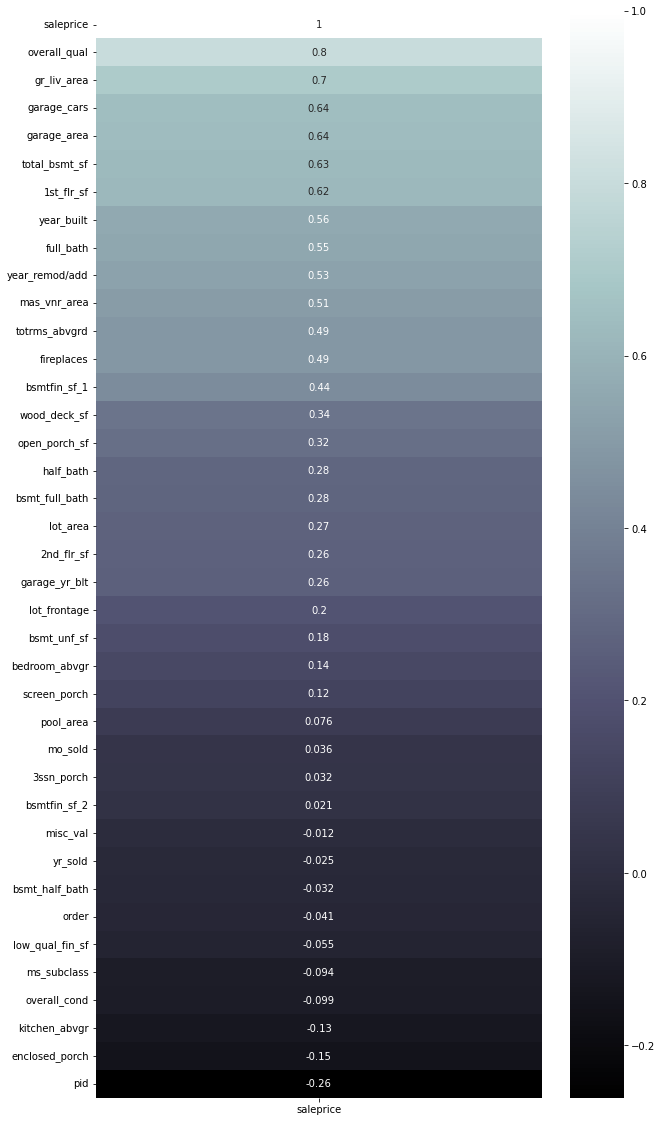

In [11]:
# Check correlation with saleprice to find interesting variables.
plt.figure(figsize=(10,20))
sns.heatmap(train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False)
            , cmap='bone', annot=True);

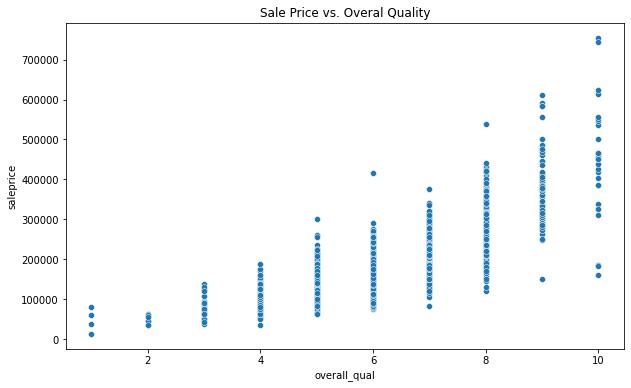

In [12]:
# Plot saleprice vs. overall_qual

plt.figure(figsize=(10,6))
sns.scatterplot(x=train['overall_qual'], y=train['saleprice'])
plt.title("Sale Price vs. Overal Quality");

## The chart looks normal

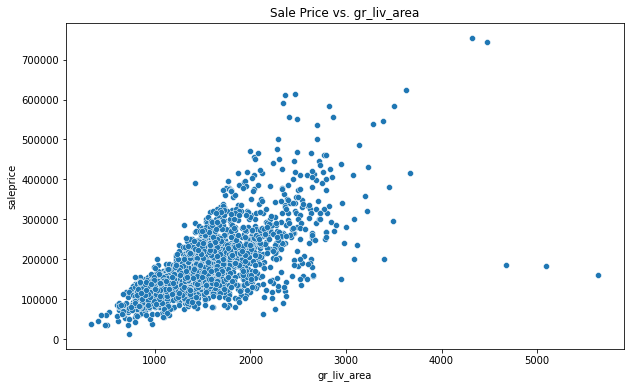

In [13]:
# Plot saleprice vs. gr_liv_area

plt.figure(figsize=(10,6))
sns.scatterplot(x=train['gr_liv_area'], y=train['saleprice'])
plt.title("Sale Price vs. gr_liv_area");

## There are some outliers for gr_liv_area over 4000 that could be removed

In [14]:
# Drop outlier
train = train[(train['gr_liv_area'] < 4000) | (train['saleprice'] > 400000)]

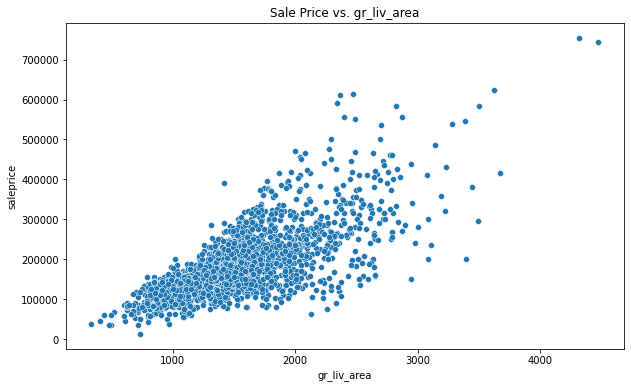

In [15]:
# Re-plot to check

plt.figure(figsize=(10,6))
sns.scatterplot(x=train['gr_liv_area'], y=train['saleprice'])
plt.title("Sale Price vs. gr_liv_area");


In [16]:
train['totrms_abvgrd']

0        6
1        7
2        7
3        6
4        7
        ..
2192     8
2193     7
2194     8
2195     5
2196    10
Name: totrms_abvgrd, Length: 2194, dtype: int64

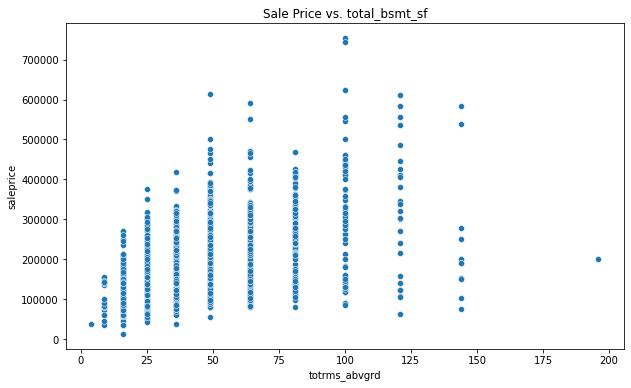

In [17]:
# Plot saleprice vs. gr_liv_area

plt.figure(figsize=(10,6))
sns.scatterplot(x=train['totrms_abvgrd'] ** 2, y=train['saleprice'])
plt.title("Sale Price vs. total_bsmt_sf");

## There are some outliers for gr_liv_area over 4000 that could be removed

# EDA

In [18]:
# Get top correlated features.
features_top10 = train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False).index[1:11]
features_top15 = train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False).index[1:16]
features_top20 = train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False).index[1:21]

Skewness: 1.777937011298179


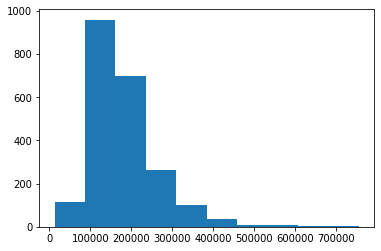

In [19]:
# Plot saleprice distribution.
print('Skewness:', train['saleprice'].skew())
plt.hist(train['saleprice']);

## The saleprice distribution is right skew so we could normalize it by using log e

### Continuous Variables
---

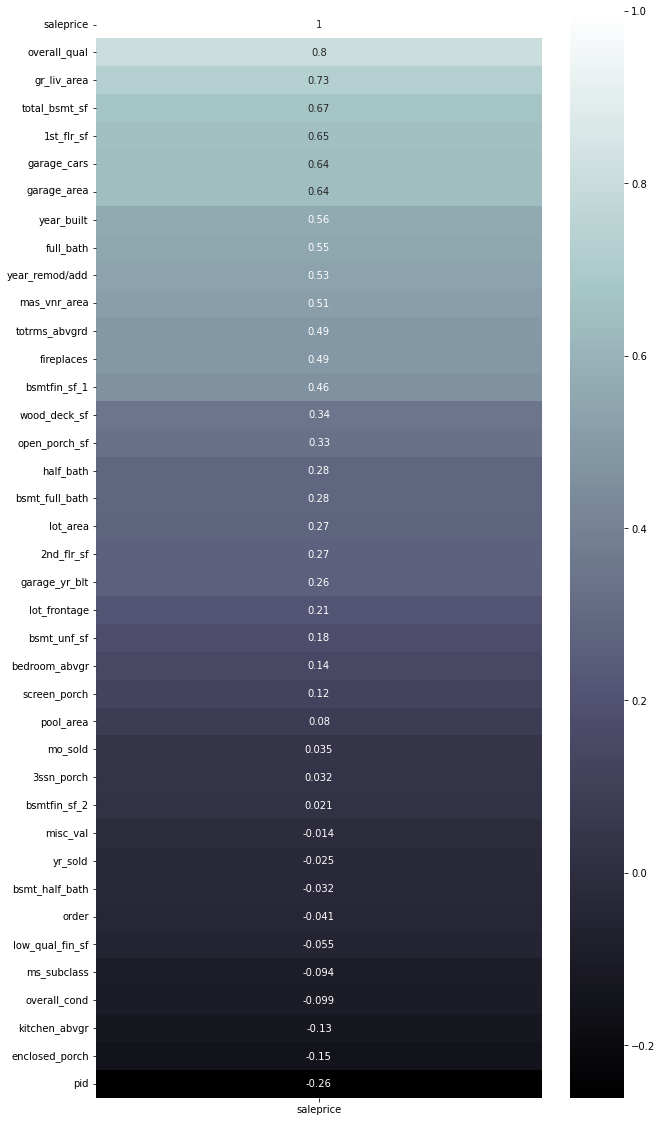

In [20]:
# Check correlation with saleprice
plt.figure(figsize=(10,20))
sns.heatmap(train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False)
            , cmap='bone', annot=True);

In [21]:
# Note for continuous variables.
## 1. garage_yr_blt : has some missing data that turned to zero
### 

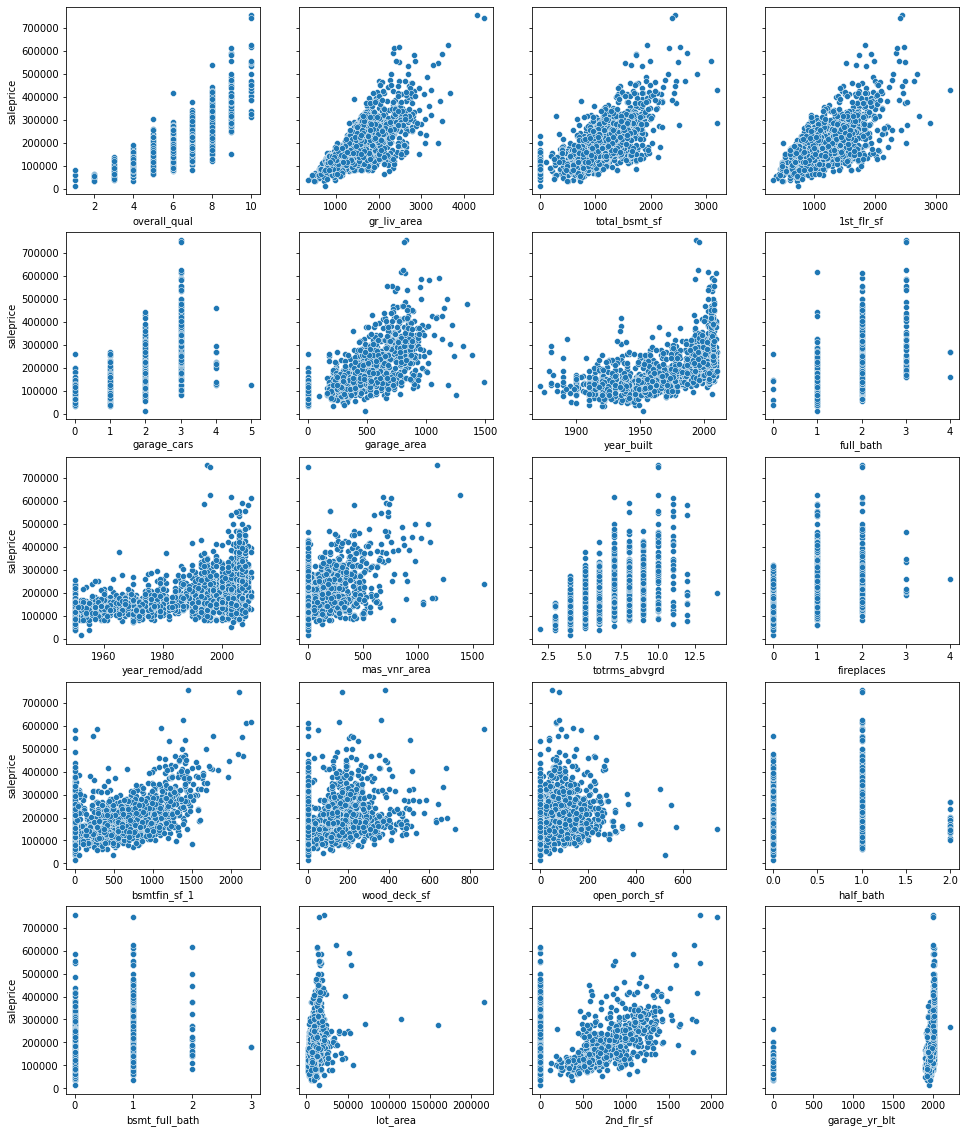

In [22]:
# Plot top 20 related features against saleprice.

fig, axes = plt.subplots(5, 4, figsize=(16,20))

for i, feat in enumerate(features_top20): ## iterate column name
    x = i // 4
    y = i % 4
    pl = sns.scatterplot(
        ax=axes[x,y],
        x=feat,
        y='saleprice',
        data=train)
    if y != 0:
        pl.set(ylabel=None, yticklabels=[])  ## show label only the leftmost plot 

### Discrete Variables
---

In [23]:
# List all of object variables name
train.dtypes[train.dtypes == 'object']

ms_zoning         object
street            object
alley             object
lot_shape         object
land_contour      object
utilities         object
lot_config        object
land_slope        object
neighborhood      object
condition_1       object
condition_2       object
bldg_type         object
house_style       object
roof_style        object
roof_matl         object
exterior_1st      object
exterior_2nd      object
mas_vnr_type      object
exter_qual        object
exter_cond        object
foundation        object
bsmt_qual         object
bsmt_cond         object
bsmt_exposure     object
bsmtfin_type_1    object
bsmtfin_type_2    object
heating           object
heating_qc        object
central_air       object
electrical        object
kitchen_qual      object
functional        object
fireplace_qu      object
garage_type       object
garage_finish     object
garage_qual       object
garage_cond       object
paved_drive       object
pool_qc           object
fence             object


In [24]:
# Check number of discrete variables
'number of discrete variables', len(train.dtypes[train.dtypes == 'object'])

('number of discrete variables', 43)

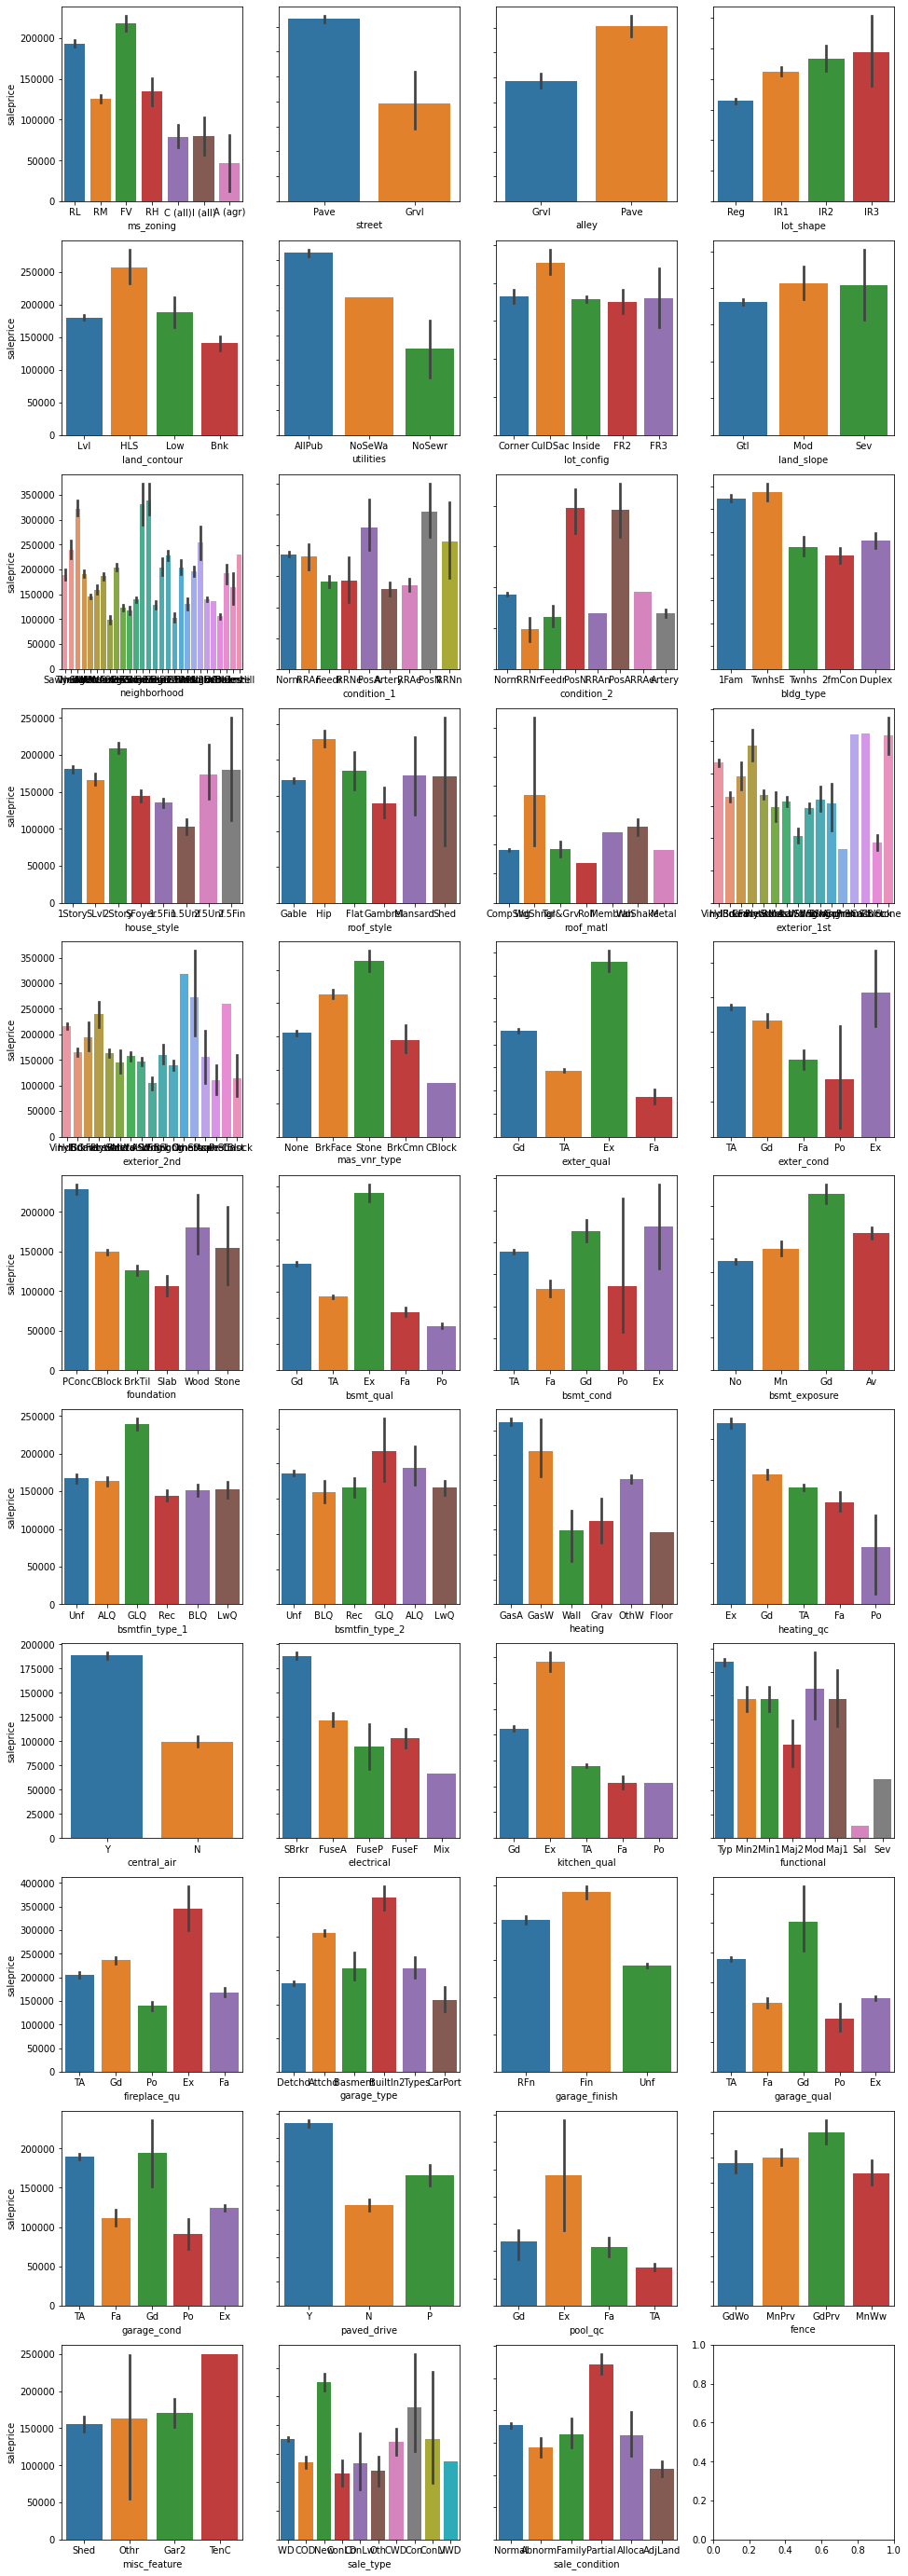

In [25]:
# Plot all categorical variables against saleprice

fig, axes = plt.subplots(11, 4, figsize=(16,50))

for i, feat in enumerate(train.dtypes[train.dtypes == 'object'].index): ## iterate column name
    x = i // 4
    y = i % 4
    pl = sns.barplot(
        ax=axes[x,y],
        x=feat,
        y='saleprice',
        data=train)
    if y != 0:
        pl.set(ylabel=None, yticklabels=[])  ## show label only the leftmost plot 

In [26]:
train['foundation'].value_counts()

PConc     998
CBlock    916
BrkTil    226
Slab       40
Stone       9
Wood        5
Name: foundation, dtype: int64

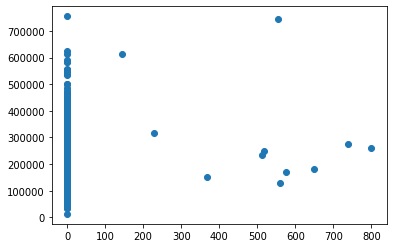

In [27]:
# Plot pool area vs. saleprice.

plt.scatter(train['pool_area'], train['saleprice'])

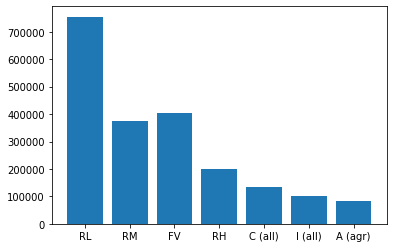

In [28]:
# MS Zoning vs. Sale Price
plt.bar(train['ms_zoning'], train['saleprice']);

In [29]:
train['ms_zoning'].value_counts()

RL         1701
RM          340
FV          113
C (all)      19
RH           17
I (all)       2
A (agr)       2
Name: ms_zoning, dtype: int64

In [30]:
train.groupby('neighborhood')['saleprice'].mean().sort_values(ascending=False)

neighborhood
NoRidge    338829.961538
StoneBr    331621.416667
NridgHt    322979.933333
Veenker    255403.333333
Timber     239055.500000
GrnHill    230000.000000
Somerst    228905.691275
ClearCr    204847.733333
Crawfor    204770.065789
CollgCr    204671.584906
Blmngtn    196680.208333
Greens     192375.000000
Gilbert    191657.330709
SawyerW    189215.258427
NWAmes     186945.761905
Blueste    165000.000000
Mitchel    159900.404494
NAmes      145474.021605
NPkVill    140492.105263
Sawyer     139720.111111
Landmrk    137000.000000
SWISU      131189.656250
Edwards    128610.178082
OldTown    123425.126374
BrkSide    117867.708333
BrDale     106176.190476
IDOTRR     103399.614286
MeadowV     98298.076923
Name: saleprice, dtype: float64

# Features Engineering

In [31]:
features_top15

Index(['overall_qual', 'gr_liv_area', 'total_bsmt_sf', '1st_flr_sf',
       'garage_cars', 'garage_area', 'year_built', 'full_bath',
       'year_remod/add', 'mas_vnr_area', 'totrms_abvgrd', 'fireplaces',
       'bsmtfin_sf_1', 'wood_deck_sf', 'open_porch_sf'],
      dtype='object')

In [32]:
# Innitiate dummy DataFrame
dummy_df = pd.DataFrame()

# Add saleprice variable to dummy
dummy_df['saleprice'] = train['saleprice']

In [33]:
# Dummy pool_area

dummy_df['pool_dummy'] = train['pool_area'].map(lambda x : 0 if x == 0 else 1) 

In [34]:
dummy_df.groupby('pool_dummy')['saleprice'].mean()

pool_dummy
0    181778.915254
1    302724.545455
Name: saleprice, dtype: float64

In [35]:
# Dummy zoning RL
dummy_df['ms_zoning_rl'] = train['ms_zoning'] == 'RL' 

In [36]:
dummy_df.groupby('ms_zoning_rl')['saleprice'].mean()

ms_zoning_rl
False    144949.369168
True     193235.333921
Name: saleprice, dtype: float64

In [37]:
# Dummy zoning RL_FV
dummy_df['ms_zoning_rlfv'] = train['ms_zoning'].apply(lambda x : 1 if x in ['RL','FV'] else 0) 

In [38]:
dummy_df['ms_zoning_rlfv'].value_counts()

1    1814
0     380
Name: ms_zoning_rlfv, dtype: int64

In [39]:
dummy_df.groupby('ms_zoning_rlfv')['saleprice'].mean()

ms_zoning_rlfv
0    123186.128947
1    194786.445976
Name: saleprice, dtype: float64

# Make model
---

In [70]:
# create function to return model metrics

def r2_adj(model, X, y):
    return 1 - (1-model.score(X, y)) * (len(y) - 1 ) / (len(y) - X.shape[1] - 1)

def reg_metrics(X, y, mode='normal'):
    """Print model metrics and return regression model
    from given X, y"""
    # Split data.
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.01)
    
    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Create metrics - train
    y_train_preds = model.predict(X_train)
    train_mae = metrics.mean_absolute_error(y_train, y_train_preds)
    train_rmse = metrics.mean_squared_error(y_train, y_train_preds, squared=False)
    train_r2 = metrics.r2_score(y_train, y_train_preds)
    train_adj_r2 = r2_adj(model, X_train, y_train)
    
    # Create metrics - test
    y_test_preds = model.predict(X_test)
    test_mae = metrics.mean_absolute_error(y_test, y_test_preds)
    test_rmse = metrics.mean_squared_error(y_test, y_test_preds, squared=False)
    test_r2 = metrics.r2_score(y_test, y_test_preds)
    test_adj_r2 = r2_adj(model, X_test, y_test)
    
    # Additional metrics
    train_exp_rmse = 'none'
    test_exp_rmse = 'none'
    if mode != 'normal':
        train_exp_rmse = metrics.mean_squared_error(np.exp(y_train), np.exp(y_train_preds), squared=False)
        test_exp_rmse = metrics.mean_squared_error(np.exp(y_test), np.exp(y_test_preds), squared=False)
        
    print(f"""-----------Train Data-----------
MAE: {train_mae}
RMSE: {train_rmse}
EXP(RMSE): {train_exp_rmse}
R2: {train_r2}
Adj_R2: {train_adj_r2}
Cross Validation: {cross_val_score(model, X_train, y_train)}
Cross Validation Mean: {cross_val_score(model, X_train, y_train).mean()}
--------------------------------""")
    print(f"""-----------Test Data-----------
MAE: {test_mae}
RMSE: {test_rmse}
EXP(RMSE): {test_exp_rmse}
R2: {test_r2}
Adj_R2: {test_adj_r2}
--------------------------------""")
    return model

# Evaluate model

In [41]:
features_top15

Index(['overall_qual', 'gr_liv_area', 'total_bsmt_sf', '1st_flr_sf',
       'garage_cars', 'garage_area', 'year_built', 'full_bath',
       'year_remod/add', 'mas_vnr_area', 'totrms_abvgrd', 'fireplaces',
       'bsmtfin_sf_1', 'wood_deck_sf', 'open_porch_sf'],
      dtype='object')

In [71]:
# Baseline model: Top 10 correlation variables

X = train[features_top10]
y = train['saleprice']

# Train model
reg_metrics(X, y, mode='normal')



-----------Train Data-----------
MAE: 23165.613007640753
RMSE: 32920.07026640172
EXP(RMSE): none
R2: 0.836037294021313
Adj_R2: 0.8352785586859188
Cross Validation: [0.81516943 0.83069561 0.85445914 0.82925532 0.82231908]
Cross Validation Mean: 0.8303797153878045
--------------------------------
-----------Test Data-----------
MAE: 15121.213311391259
RMSE: 18625.75346627172
EXP(RMSE): none
R2: 0.9256707215412081
Adj_R2: 0.8580986502150336
--------------------------------


LinearRegression()

In [ ]:
# Name of dummies used in the model.
dummy_normal = ['bldg_type', 'lot_shape', 'land_contour', 'exter_qual'
          , 'sale_condition', 'functional', 'fireplace_qu', 'central_air'
          , "paved_drive", 'neighborhood']

dummy_group = ['ms_zoning', 'condition_1', 'sale_type', 'exterior_1st'
               , 'bsmt_qual', 'exterior_2nd', 'garage_qual'
               , 'garage_cond', 'heating_qc', 'kitchen_qual'
               , 'misc_feature']

In [ ]:
# train['log_saleprice'] = np.log(train['saleprice'])

# train = train[train['log_saleprice'] > 10]

In [72]:
# Adjust Model 6 : Model4 + More dummies

# Get top15 features name
feature = features_top15.to_list()

# Set dummy variables
dummy = ["bldg_type", "lot_shape", "land_contour","exter_qual"
         , "sale_condition"
         , "functional", "fireplace_qu"
         , 'central_air'
         , "paved_drive", "neighborhood"]

#, "exterior_1st", "bsmt_qual", "exterior_2nd", 'garage_qual', "garage_cond", 'heating_qc', "kitchen_qual","neighborhood"
#, "misc_feature"

# Combine top15 and dummy
feature = feature + dummy

# Get data for X variabls
X = train[feature]

# Create dummy for X
X = pd.get_dummies(X, drop_first=True)


# Create manual ms_zoning if zoning = RL / FV -> 1, else 0
X = X.merge(train['ms_zoning'].apply(lambda x : 1 if x in ['RL','FV'] else 0),
       left_index=True, right_index=True)

# Add condition_1 to the model
condition_1_group = train.groupby('condition_1')['saleprice'].agg(['count', 'mean'])\
.sort_values(by='mean', ascending=False)[:5].index.to_list()

X = X.merge(train['condition_1'].apply(lambda x : 1 if x in condition_1_group else 0),
       left_index=True, right_index=True)


# Add sale_type to the model
sale_type_group = train.groupby('sale_type')['saleprice'].mean().sort_values(ascending=False)[:3].index.to_list()

X = X.merge(train['sale_type'].apply(lambda x : 1 if x in sale_type_group else 0),
       left_index=True, right_index=True)

# Add exterior_1st to the model
exterior_1st_group = train.groupby('exterior_1st')['saleprice'].mean().sort_values(ascending=False)[:6].index.to_list()

X = X.merge(train['exterior_1st'].apply(lambda x : 1 if x in exterior_1st_group else 0),
       left_index=True, right_index=True)

# Add bsmt_qual to the model
bsmt_qual_group = train.groupby('bsmt_qual')['saleprice'].mean().sort_values(ascending=False)[:1].index.to_list()

X = X.merge(train['bsmt_qual'].apply(lambda x : 1 if x in bsmt_qual_group else 0),
       left_index=True, right_index=True)

# Add exterior_2nd to the model
exterior_2nd_group = train.groupby('exterior_2nd')['saleprice'].mean().sort_values(ascending=False)[:3].index.to_list()

X = X.merge(train['exterior_2nd'].apply(lambda x : 1 if x in exterior_2nd_group else 0),
       left_index=True, right_index=True)

# Add garage_qual to the model
garage_qual_group = train.groupby('garage_qual')['saleprice'].mean().sort_values(ascending=False)[:1].index.to_list()

X = X.merge(train['garage_qual'].apply(lambda x : 1 if x in garage_qual_group else 0),
       left_index=True, right_index=True)

# Add garage_cond to the model
garage_cond_group = train.groupby('garage_cond')['saleprice'].mean().sort_values(ascending=False)[:2].index.to_list()

X = X.merge(train['garage_cond'].apply(lambda x : 1 if x in garage_cond_group else 0),
       left_index=True, right_index=True)

# Add heating_qc to the model
heating_qc_group = train.groupby('heating_qc')['saleprice'].mean().sort_values(ascending=False)[:2].index.to_list()

X = X.merge(train['heating_qc'].apply(lambda x : 1 if x in heating_qc_group else 0),
       left_index=True, right_index=True)

# Add kitchen_qual to the model
kitchen_qual_group = train.groupby('kitchen_qual')['saleprice'].mean().sort_values(ascending=False)[:1].index.to_list()

X = X.merge(train['kitchen_qual'].apply(lambda x : 1 if x in kitchen_qual_group else 0),
       left_index=True, right_index=True)

# Add misc_feature to the model
misc_feature_group = train.groupby('misc_feature')['saleprice'].mean().sort_values(ascending=False)[:3].index.to_list()

X = X.merge(train['misc_feature'].apply(lambda x : 1 if x in misc_feature_group else 0),
       left_index=True, right_index=True)

# # Add neighborhood to the model
# neighborhood_group = train.groupby('neighborhood')['saleprice'].mean().sort_values(ascending=False)[:3].index.to_list()

# X = X.merge(train['neighborhood'].apply(lambda x : 1 if x in neighborhood_group else 0),
#        left_index=True, right_index=True)


# Interaction
X['overall_qual_interact'] = X['overall_qual'] * X['fireplaces']


# Transfrom to ^2
X['garage_car'] = X['garage_cars'] ** 2
X['year_remod/add'] = X['year_remod/add'] ** 2


# Log Transform
X['lot_area'] = np.log(train['lot_area'])


# gr_liv_area^2 total_bsmt_sf  
#  overall_qual gr_liv_area total_bsmt_sf 
# gr_liv_area^3
# X['overall_qual'] = X['overall_qual'] ** 2
# X['year_built'] = X['year_built'] ** 2
# X['overall_qual'] = np.log(X['overall_qual'])
# X['1st_flr_sf'] = np.log(train['1st_flr_sf'])





# Drop variables
X = X.drop(columns=['open_porch_sf', 'totrms_abvgrd'])
#, 'mas_vnr_area'


X = X.reindex(sorted(X.columns), axis=1)


# Get y
y = np.log(train['saleprice'])




# Train model
model = reg_metrics(X, y, mode='logy')
# model = LinearRegression()
# model.fit(X, y)

# Evaluation after log
y_preds = model.predict(X)
'RMSE', metrics.mean_squared_error(np.exp(y), np.exp(y_preds), squared=False)


-----------Train Data-----------
MAE: 0.07558607805488958
RMSE: 0.1069865898648055
EXP(RMSE): 19256.67379102282
R2: 0.9322542323600949
Adj_R2: 0.9294599225197918
Cross Validation: [0.91155925 0.90619503 0.93758928 0.91893422 0.92738495]
Cross Validation Mean: 0.9203325473943977
--------------------------------
-----------Test Data-----------
MAE: 0.04644465463739705
RMSE: 0.05970132537486384
EXP(RMSE): 11948.499102676333
R2: 0.9711958795285818
Adj_R2: 1.0093059466138428
--------------------------------


('RMSE', 19197.20605491034)

#### Best RMSE: 19198.52504

# Prediction & Submission

In [ ]:
## load test data
# test = pd.read_csv('./data/test.csv')
test.head()

In [ ]:
test.columns = test.columns.str.lower().str.replace(" ", "_")

## Submission

In [ ]:
train.groupby('neighborhood')['saleprice'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)

### Clean Data

In [ ]:
test[features_top10] = test[features_top10].fillna(0)

### Predict Data

In [67]:
# Prep X for test data
X_submit = test[feature]
X_submit = pd.get_dummies(X_submit, drop_first=True)

X_submit = X_submit.merge(test['ms_zoning'].apply(lambda x : 1 if x in ['RL','FV'] else 0),
       left_index=True, right_index=True)

X_submit = X_submit.merge(test['condition_1'].apply(lambda x : 1 if x in condition_1_group else 0),
       left_index=True, right_index=True)

X_submit = X_submit.merge(test['sale_type'].apply(lambda x : 1 if x in sale_type_group else 0),
       left_index=True, right_index=True)

X_submit = X_submit.merge(test['exterior_1st'].apply(lambda x : 1 if x in exterior_1st_group else 0),
       left_index=True, right_index=True)

X_submit = X_submit.merge(test['bsmt_qual'].apply(lambda x : 1 if x in bsmt_qual_group else 0),
       left_index=True, right_index=True)

X_submit = X_submit.merge(test['exterior_2nd'].apply(lambda x : 1 if x in exterior_2nd_group else 0),
       left_index=True, right_index=True)

X_submit = X_submit.merge(test['garage_qual'].apply(lambda x : 1 if x in garage_qual_group else 0),
       left_index=True, right_index=True)

X_submit = X_submit.merge(test['garage_cond'].apply(lambda x : 1 if x in garage_cond_group else 0),
       left_index=True, right_index=True)

X_submit = X_submit.merge(test['heating_qc'].apply(lambda x : 1 if x in heating_qc_group else 0),
       left_index=True, right_index=True)

X_submit = X_submit.merge(test['kitchen_qual'].apply(lambda x : 1 if x in kitchen_qual_group else 0),
       left_index=True, right_index=True)

X_submit = X_submit.merge(test['misc_feature'].apply(lambda x : 1 if x in misc_feature_group else 0),
       left_index=True, right_index=True)


X_submit['neighborhood_Landmrk'] = 0


# Interaction
X_submit['overall_qual_interact'] = X_submit['overall_qual'] * X_submit['fireplaces']


# Transfrom to ^2
X_submit['garage_car'] = X_submit['garage_cars'] ** 2
X_submit['year_remod/add'] = X_submit['year_remod/add'] ** 2


# Log Transform
X_submit['lot_area'] = np.log(test['lot_area'])



X_submit = X_submit.drop(columns=['open_porch_sf', 'totrms_abvgrd'])


X_submit = X_submit.reindex(sorted(X_submit.columns), axis=1)


preds_test = model.predict(X_submit)
preds_test[:10]

array([11.71808852, 12.10812931, 12.20500377, 12.28646059, 12.12067384,
       11.76025595, 12.26029779, 11.96378655, 11.69467678, 11.78419189])

### Create submission table

In [68]:
## create dataframe with "Order" and prediction
pred_df = pd.DataFrame({'Order':test['order'], 'SalePrice':np.exp(preds_test)})
pred_df

,Order,SalePrice
0,2127,122772.523188
1,193,181340.055803
2,2407,199786.340017
3,46,216741.481189
4,2478,183629.210645
...,...,...
728,453,193904.182714
729,1352,169081.720520
730,197,119427.663635
731,2850,167783.697085


### Export submission table

In [69]:
## save to csv file for submission
## index = False
pred_df.to_csv('submission.csv', index=False)

### Backup
---

In [55]:
# Instantiate our PolynomialFeatures object to create all two-way terms.
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

# Fit and transform our X data.
df_poly = poly.fit_transform(train[features_top10])

In [ ]:
df_poly = pd.DataFrame(df_poly, columns=poly.get_feature_names_out(features_top10))

In [ ]:
df_poly['saleprice'] = train['saleprice']

In [ ]:
df_poly.corr()['saleprice'].sort_values(ascending=False)[:20]

In [ ]:
pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)[35:45]

In [ ]:
df_log = np.log(train.select_dtypes(exclude=['object']).drop(columns=['order', 'pid', 'saleprice']))

In [ ]:
df_log['saleprice'] = train['saleprice']

In [ ]:
log_corr = df_log.corr()['saleprice'].sort_values(ascending=False)

In [ ]:
nor_corr = train.corr()['saleprice'].sort_values(ascending=False)

In [ ]:
corr_dif = pd.DataFrame(log_corr).merge(pd.DataFrame(nor_corr), left_index=True, right_index=True)

In [ ]:
corr_dif.columns = ['Log corr', 'Normal corr']

In [ ]:
corr_dif['Diff'] = corr_dif['Log corr'] - corr_dif['Normal corr']

In [ ]:
corr_dif.sort_values(by='Diff', ascending=False)